In [6]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
import pandas as pd
evadidos1 = pd.read_csv('graduacao_evadidos.csv',sep=';', encoding='latin-1')
evadidos19_1 = pd.read_csv('evadidos19_1.csv',sep=';', encoding='latin-1')
evadidos18_2 = pd.read_csv('evadidos18_2.csv',sep=';', encoding='latin-1')
evadidos18_1 = pd.read_csv('evadidos18_1.csv',sep=';', encoding='latin-1')

#Unir os ultimos 3 periodos em um dataframe, todos tinham cabeçalho identico
evadidos_EM_novo = pd.concat([evadidos18_1, evadidos18_2, evadidos19_1], ignore_index=False, sort = False)

#Transformo a cabeçalho de todas as colunas em letra maiuscula e sem acento.
evadidos1.columns = evadidos1.columns.str.upper()
evadidos_EM_novo.columns = evadidos1.columns.str.upper()

#selecionando a Escola de Minas
evadidos1em = evadidos1.loc[evadidos1['UNIDADE_ACADEMICA'] == 'ESCOLA DE MINAS']
evadidos_EM_novo = evadidos_EM_novo.loc[evadidos_EM_novo['UNIDADE_ACADEMICA'] == 'ESCOLA DE MINAS']

#juntando o dataframe com todos os evadidos da EM
evadidos = pd.concat([evadidos_EM_novo, evadidos1em], ignore_index=False, sort = False)

In [24]:
#agrupo os evadidos pelo ano
evadidos_por_ano = evadidos.groupby(['ANO']).EVADIDOS.sum()

#para agrupar pela data transformei os anos em variavel tipo data e somei os periodos.
EM_total['SemestreLetivo'] = pd.to_datetime(EM_total['SemestreLetivo'], format='%Y/%m')
matriculados = EM_total.groupby(EM_total['SemestreLetivo'].dt.year).TotalGeral.sum()
matriculados = pd.DataFrame(matriculados)

tabela = pd.DataFrame(evadidos_por_ano)
tabela['matriculados'] = matriculados['TotalGeral']
tabela['Taxa de Evasão'] = (tabela['EVADIDOS']/tabela['matriculados'])
tabela = tabela.reset_index()
tabela.iloc[15,1] = 303
tabela.iloc[16,1] = 140
tabela.iloc[15,3] = (303/6173)
tabela.iloc[16,3] = (140/3101)
tabela.to_csv('tabela_EM.csv')
tabela


,ANO,CURSO,EVADIDOS,matriculados,Taxa de Evasão
0,2003,ENGENHARIA AMBIENTAL-AMB,2,217,0.009217
1,2003,ENGENHARIA CIVIL-CIV,10,578,0.017301
2,2003,ENGENHARIA DE CONTROLE E AUTOMACAO-AUT,9,196,0.045918
3,2003,ENGENHARIA DE MINAS-MIN,1,459,0.002179
4,2003,ENGENHARIA DE PRODUCAO-PRO,4,456,0.008772
...,...,...,...,...,...
138,2019,ENGENHARIA DE PRODUCAO-PRO,11,364,0.030220
139,2019,ENGENHARIA GEOLOGICA-GEO,16,378,0.042328
140,2019,ENGENHARIA MECANICA-MEC,8,361,0.022161
141,2019,ENGENHARIA METALURGICA-MET,27,298,0.090604


In [14]:
EM_total

,SemestreLetivo,Formato,Curso,TotalGeral
0,2008-02-01,PRESENCIAL,ARQUITETURA E URBANISMO-ARQ,36
1,2009-01-01,PRESENCIAL,ARQUITETURA E URBANISMO-ARQ,68
2,2009-02-01,PRESENCIAL,ARQUITETURA E URBANISMO-ARQ,105
3,2010-01-01,PRESENCIAL,ARQUITETURA E URBANISMO-ARQ,145
4,2010-02-01,PRESENCIAL,ARQUITETURA E URBANISMO-ARQ,177
...,...,...,...,...
272,2018-02-01,PRESENCIAL,ENGENHARIA METALURGICA-MET,305
273,2019-01-01,PRESENCIAL,ENGENHARIA METALURGICA-MET,298
274,2018-01-01,PRESENCIAL,ENGENHARIA URBANA-URB,36
275,2018-02-01,PRESENCIAL,ENGENHARIA URBANA-URB,59


In [7]:
#seleção dos bancos de dados de evasão por curso.
evadidos_amb = evadidos.loc[evadidos['CURSO'] == 'ENGENHARIA AMBIENTAL-AMB']
evadidos_arq = evadidos.loc[evadidos['CURSO'] == 'ARQUITETURA E URBANISMO-ARQ']
evadidos_civ = evadidos.loc[evadidos['CURSO'] == 'ENGENHARIA CIVIL-CIV']
evadidos_cat = evadidos.loc[evadidos['CURSO'] == 'ENGENHARIA DE CONTROLE E AUTOMACAO-AUT']
evadidos_minas = evadidos.loc[evadidos['CURSO'] == 'ENGENHARIA DE MINAS-MIN']
evadidos_pro = evadidos.loc[evadidos['CURSO'] == 'ENGENHARIA DE PRODUCAO-PRO']
evadidos_geo = evadidos.loc[evadidos['CURSO'] == 'ENGENHARIA GEOLOGICA-GEO']
evadidos_mec = evadidos.loc[evadidos['CURSO'] == 'ENGENHARIA MECANICA-MEC']
evadidos_met = evadidos.loc[evadidos['CURSO'] == 'ENGENHARIA METALURGICA-MET']
evadidos_urb = evadidos.loc[evadidos['CURSO'] == 'ENGENHARIA URBANA-URB']

#seleção dos bancos de dados de matriculados
amb = EM_total.loc[EM_total['Curso'] == 'ENGENHARIA AMBIENTAL-AMB']
arq = EM_total.loc[EM_total['Curso'] == 'ARQUITETURA E URBANISMO-ARQ']
civ = EM_total.loc[EM_total['Curso'] == 'ENGENHARIA CIVIL-CIV']
cat = EM_total.loc[EM_total['Curso'] == 'ENGENHARIA DE CONTROLE E AUTOMACAO-AUT']
minas = EM_total.loc[EM_total['Curso'] == 'ENGENHARIA DE MINAS-MIN']
pro = EM_total.loc[EM_total['Curso'] == 'ENGENHARIA DE PRODUCAO-PRO']
geo = EM_total.loc[EM_total['Curso'] == 'ENGENHARIA GEOLOGICA-GEO']
mec = EM_total.loc[EM_total['Curso'] == 'ENGENHARIA MECANICA-MEC']
met = EM_total.loc[EM_total['Curso'] == 'ENGENHARIA METALURGICA-MET']
urb = EM_total.loc[EM_total['Curso'] == 'ENGENHARIA URBANA-URB']

In [9]:
#tabela ambiental
evadidos_por_ano_amb = evadidos_amb.groupby(['ANO']).EVADIDOS.sum()

amb['SemestreLetivo'] = pd.to_datetime(amb['SemestreLetivo'], format='%Y/%m')
matriculados = amb.groupby(amb['SemestreLetivo'].dt.year).TotalGeral.sum()
matriculados = pd.DataFrame(matriculados)

tabela_amb = pd.DataFrame(evadidos_por_ano_amb)
tabela_amb['matriculados'] = matriculados['TotalGeral']
tabela_amb['Taxa de Evasão'] = (tabela_amb['EVADIDOS']/tabela_amb['matriculados'])
tabela_amb = tabela_amb.reset_index()
tabela_amb['CURSO'] = 'AMB'

#tabela Arquitetura
evadidos_por_ano_arq = evadidos_arq.groupby(['ANO']).EVADIDOS.sum()

arq['SemestreLetivo'] = pd.to_datetime(arq['SemestreLetivo'], format='%Y/%m')
matriculados = arq.groupby(arq['SemestreLetivo'].dt.year).TotalGeral.sum()
matriculados = pd.DataFrame(matriculados)

tabela_arq = pd.DataFrame(evadidos_por_ano_arq)
tabela_arq['matriculados'] = matriculados['TotalGeral']
tabela_arq['Taxa de Evasão'] = (tabela_arq['EVADIDOS']/tabela_arq['matriculados'])
tabela_arq = tabela_arq.reset_index()
tabela_arq['CURSO'] = 'ARQ'

#Tabela Civil
evadidos_por_ano_civ = evadidos_civ.groupby(['ANO']).EVADIDOS.sum()

civ['SemestreLetivo'] = pd.to_datetime(civ['SemestreLetivo'], format='%Y/%m')
matriculados = civ.groupby(civ['SemestreLetivo'].dt.year).TotalGeral.sum()
matriculados = pd.DataFrame(matriculados)

tabela_civ = pd.DataFrame(evadidos_por_ano_civ)
tabela_civ['matriculados'] = matriculados['TotalGeral']
tabela_civ['Taxa de Evasão'] = (tabela_civ['EVADIDOS']/tabela_civ['matriculados'])
tabela_civ = tabela_civ.reset_index()
tabela_civ['CURSO'] = 'CIV'

#Tabela Controle e Automação
evadidos_por_ano_cat = evadidos_cat.groupby(['ANO']).EVADIDOS.sum()

cat['SemestreLetivo'] = pd.to_datetime(cat['SemestreLetivo'], format='%Y/%m')
matriculados = cat.groupby(cat['SemestreLetivo'].dt.year).TotalGeral.sum()
matriculados = pd.DataFrame(matriculados)

tabela_cat = pd.DataFrame(evadidos_por_ano_cat)
tabela_cat['matriculados'] = matriculados['TotalGeral']
tabela_cat['Taxa de Evasão'] = (tabela_cat['EVADIDOS']/tabela_cat['matriculados'])
tabela_cat = tabela_cat.reset_index()
tabela_cat['CURSO'] = 'CAT'

#Tabela Minas
evadidos_por_ano_minas = evadidos_minas.groupby(['ANO']).EVADIDOS.sum()

minas['SemestreLetivo'] = pd.to_datetime(minas['SemestreLetivo'], format='%Y/%m')
matriculados = minas.groupby(minas['SemestreLetivo'].dt.year).TotalGeral.sum()
matriculados = pd.DataFrame(matriculados)

tabela_minas = pd.DataFrame(evadidos_por_ano_minas)
tabela_minas['matriculados'] = matriculados['TotalGeral']
tabela_minas['Taxa de Evasão'] = (tabela_minas['EVADIDOS']/tabela_minas['matriculados'])
tabela_minas = tabela_minas.reset_index()
tabela_minas['CURSO'] = 'MIN'

#tabela produção
evadidos_por_ano_pro = evadidos_pro.groupby(['ANO']).EVADIDOS.sum()

pro['SemestreLetivo'] = pd.to_datetime(pro['SemestreLetivo'], format='%Y/%m')
matriculados = pro.groupby(pro['SemestreLetivo'].dt.year).TotalGeral.sum()
matriculados = pd.DataFrame(matriculados)

tabela_pro = pd.DataFrame(evadidos_por_ano_pro)
tabela_pro['matriculados'] = matriculados['TotalGeral']
tabela_pro['Taxa de Evasão'] = (tabela_pro['EVADIDOS']/tabela_pro['matriculados'])
tabela_pro = tabela_pro.reset_index()
tabela_pro['CURSO'] = 'PRO'

#Tabela Geológica
evadidos_por_ano_geo = evadidos_geo.groupby(['ANO']).EVADIDOS.sum()

geo['SemestreLetivo'] = pd.to_datetime(geo['SemestreLetivo'], format='%Y/%m')
matriculados = geo.groupby(geo['SemestreLetivo'].dt.year).TotalGeral.sum()
matriculados = pd.DataFrame(matriculados)

tabela_geo = pd.DataFrame(evadidos_por_ano_geo)
tabela_geo['matriculados'] = matriculados['TotalGeral']
tabela_geo['Taxa de Evasão'] = (tabela_geo['EVADIDOS']/tabela_geo['matriculados'])
tabela_geo = tabela_geo.reset_index()
tabela_geo['CURSO'] = 'GEO'

#Tabela Mecanica
evadidos_por_ano_mec = evadidos_mec.groupby(['ANO']).EVADIDOS.sum()

mec['SemestreLetivo'] = pd.to_datetime(mec['SemestreLetivo'], format='%Y/%m')
matriculados = mec.groupby(mec['SemestreLetivo'].dt.year).TotalGeral.sum()
matriculados = pd.DataFrame(matriculados)

tabela_mec = pd.DataFrame(evadidos_por_ano_mec)
tabela_mec['matriculados'] = matriculados['TotalGeral']
tabela_mec['Taxa de Evasão'] = (tabela_mec['EVADIDOS']/tabela_mec['matriculados'])
tabela_mec = tabela_mec.reset_index()
tabela_mec['CURSO'] = 'MEC'

#Tabela Metalurgica
evadidos_por_ano_met = evadidos_met.groupby(['ANO']).EVADIDOS.sum()

met['SemestreLetivo'] = pd.to_datetime(met['SemestreLetivo'], format='%Y/%m')
matriculados = met.groupby(met['SemestreLetivo'].dt.year).TotalGeral.sum()
matriculados = pd.DataFrame(matriculados)

tabela_met = pd.DataFrame(evadidos_por_ano_met)
tabela_met['matriculados'] = matriculados['TotalGeral']
tabela_met['Taxa de Evasão'] = (tabela_met['EVADIDOS']/tabela_met['matriculados'])
tabela_met = tabela_met.reset_index()
tabela_met['CURSO'] = 'MET'

#Tabela Urbana
evadidos_por_ano_urb = evadidos_urb.groupby(['ANO']).EVADIDOS.sum()

urb['SemestreLetivo'] = pd.to_datetime(urb['SemestreLetivo'], format='%Y/%m')
matriculados = urb.groupby(urb['SemestreLetivo'].dt.year).TotalGeral.sum()
matriculados = pd.DataFrame(matriculados)

tabela_urb = pd.DataFrame(evadidos_por_ano_urb)
tabela_urb['matriculados'] = matriculados['TotalGeral']
tabela_urb['Taxa de Evasão'] = (tabela_urb['EVADIDOS']/tabela_urb['matriculados'])
tabela_urb = tabela_urb.reset_index()
tabela_urb['CURSO'] = 'URB'

In [10]:
tabela_evasao_cursos_por_ano = pd.concat([tabela_urb, tabela_met, tabela_mec, tabela_geo, tabela_pro, tabela_minas, tabela_cat, tabela_civ, tabela_arq, tabela_amb])
tabela_evasao_cursos_por_ano = pd.DataFrame(tabela_evasao_cursos_por_ano)

In [12]:
datas_de_interesse = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
tabela_evasao_cursos_por_ano = tabela_evasao_cursos_por_ano[tabela_evasao_cursos_por_ano['ANO'].isin(datas_de_interesse) == True]
tabela_evasao_cursos_por_ano.to_csv('evadidos_por_ano_e_curso.csv')
tabela_evasao_cursos_por_ano

,ANO,EVADIDOS,matriculados,Taxa de Evasão,CURSO
0,2018,11,95,0.115789,URB
1,2019,4,94,0.042553,URB
7,2010,13,616,0.021104,MET
8,2011,16,657,0.024353,MET
9,2012,31,670,0.046269,MET
...,...,...,...,...,...
12,2015,24,355,0.067606,AMB
13,2016,26,359,0.072423,AMB
14,2017,21,349,0.060172,AMB
15,2018,33,337,0.097923,AMB


In [8]:
# tabela_evasao_por_ano = tabela_evasao_cursos_por_ano.loc[tabela_evasao_cursos_por_ano['ANO'] == 2018]
# tabela_evasao_por_ano.EVADIDOS.sum()

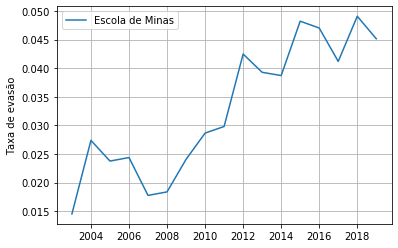

In [15]:
import matplotlib.pyplot as plt
plt.plot(tabela.iloc[:,0].values, tabela.iloc[:,3].values, label = 'Escola de Minas')
plt.ylabel('Taxa de evasão')
#análise exploratória visual
plt.grid(True)
plt.legend(loc = ('best'))
plt.show()

#Preço da passagem
#Quantidade de reprovação

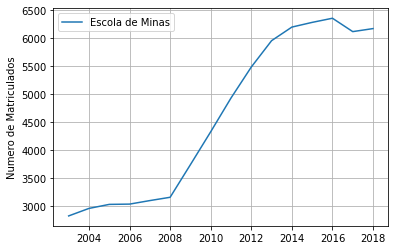

In [11]:
tabela1 = tabela.drop([16])
tabela1
import matplotlib.pyplot as plt
plt.plot(tabela1.iloc[:,0].values, tabela1.iloc[:,2].values, label = 'Escola de Minas')
plt.ylabel('Numero de Matriculados')
plt.grid(True)
plt.legend(loc = ('best'))
plt.show()

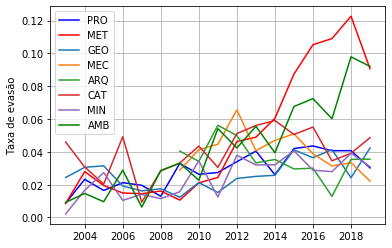

In [12]:
#análise exploratória visual
import matplotlib.pyplot as plt
plt.plot(tabela_pro.iloc[:,0].values, tabela_pro.iloc[:,3].values, color = 'blue' , label = 'PRO')
#plt.plot(tabela_civ.iloc[:,0].values, tabela_civ.iloc[:,3].values, label = 'CIV')
plt.plot(tabela_met.iloc[:,0].values, tabela_met.iloc[:,3].values,color = 'red', label = 'MET')
plt.plot(tabela_geo.iloc[:,0].values, tabela_geo.iloc[:,3].values, label = 'GEO')
plt.plot(tabela_mec.iloc[:,0].values, tabela_mec.iloc[:,3].values, label = 'MEC')
plt.plot(tabela_arq.iloc[:,0].values, tabela_arq.iloc[:,3].values, label = 'ARQ')
#plt.plot(tabela_urb.iloc[:,0].values, tabela_urb.iloc[:,3].values, label = 'URB')
plt.plot(tabela_cat.iloc[:,0].values, tabela_cat.iloc[:,3].values, label = 'CAT')
plt.plot(tabela_minas.iloc[:,0].values, tabela_minas.iloc[:,3].values, label = 'MIN')
plt.plot(tabela_amb.iloc[:,0].values, tabela_amb.iloc[:,3].values,color = 'green', label = 'AMB')

plt.ylabel('Taxa de evasão')
plt.grid(True)
plt.legend(loc = ('best'))
plt.show()


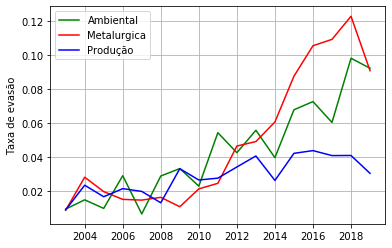

In [288]:
#análise exploratória visual
import matplotlib.pyplot as plt
plt.plot(tabela_amb.iloc[:,0].values, tabela_amb.iloc[:,3].values, color = 'green', label = 'Ambiental')
plt.plot(tabela_met.iloc[:,0].values, tabela_met.iloc[:,3].values, color = 'red', label = 'Metalurgica')
plt.plot(tabela_pro.iloc[:,0].values, tabela_pro.iloc[:,3].values, color = 'blue', label = 'Produção')
plt.ylabel('Taxa de evasão')
plt.grid(True)
plt.legend(loc = ('best'))
plt.title('Compração da evasão da Eng Produção com os dois cursos com mais evadidos')
plt.show()

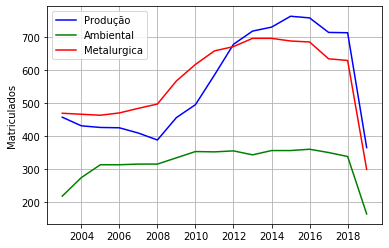

In [289]:
#análise exploratória visual
import matplotlib.pyplot as plt
plt.plot(tabela_pro.iloc[:,0].values, tabela_pro.iloc[:,2].values, color = 'blue', label = 'Produção')
plt.plot(tabela_amb.iloc[:,0].values, tabela_amb.iloc[:,2].values, color = 'green', label = 'Ambiental')
plt.plot(tabela_met.iloc[:,0].values, tabela_met.iloc[:,2].values, color = 'red', label = 'Metalurgica')
plt.ylabel('Matriculados')
plt.grid(True)
plt.legend(loc = ('best'))
plt.show()